## Regression Model

#### Prediction of sales of TV, Radio and Newspaper based on Advertisement

Dataset available at:
    
“http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv"

Reasonable result using Multilayer perceptron after a thousand epochs

In [3]:
# Step 1 - Loading the Required Libraries and Modules

# Import required libraries
from __future__ import absolute_import, division, print_function, unicode_literals


import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense


import pathlib
import seaborn as sns
from sklearn import metrics

In [4]:
# Step 2 - Reading the Data and Performing Basic Data Checks

df = pd.read_csv('Advertising.csv') 
print(df.shape)
df.head()

(200, 4)


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
# Display Data distribution
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
# Step 3 - Creating Arrays for the Features and the Response Variable


target_column = ['Sales'] 
predictors = list(set(list(df.columns))-set(target_column))
df[predictors] = df[predictors]/df[predictors].max()
df.describe()



,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,0.496095,0.469032,0.268018,14.022500
std,0.289657,0.299331,0.191041,5.217457
min,0.002362,0.000000,0.002632,1.600000
25%,0.250928,0.201109,0.111842,10.375000
50%,0.505229,0.461694,0.225877,12.900000
75%,0.738276,0.736391,0.395614,17.400000
max,1.000000,1.000000,1.000000,27.000000


In [7]:
# Step 4 - Creating the Training and Test Datasets


X = df[predictors].values
y = df[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=40)
print(X_train.shape); print(X_test.shape)




(170, 3)
(30, 3)


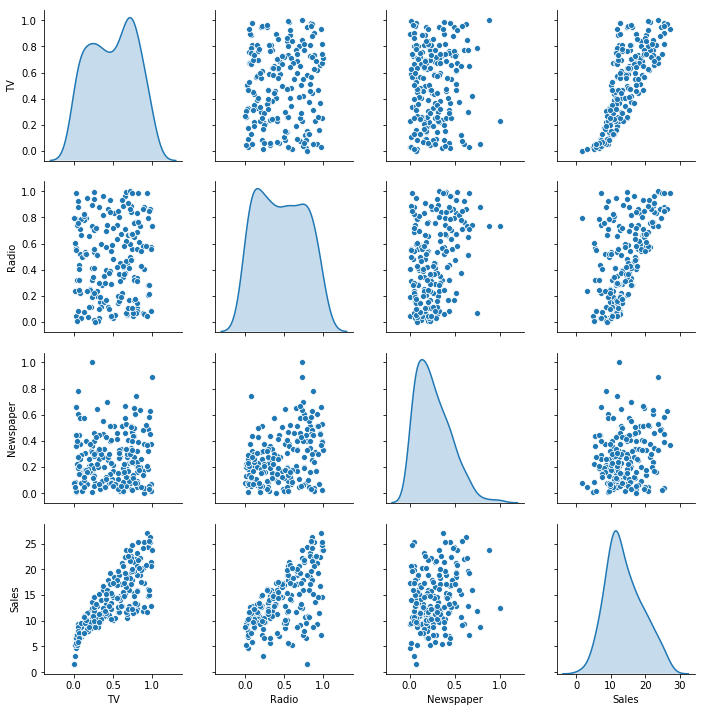

In [8]:
sns.pairplot(df[["TV", "Radio", "Newspaper", "Sales"]], diag_kind="kde")


In [11]:
# Step 5 - Building the Deep Learning Regression Model

# Define model
model = Sequential()
model.add(Dense(500, input_dim=3, activation= "relu"))
model.add(Dense(100, activation= "relu"))
model.add(Dense(50, activation= "relu"))
model.add(Dense(1))
model.summary() 


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 500)               2000      
_________________________________________________________________
dense_6 (Dense)              (None, 100)               50100     
_________________________________________________________________
dense_7 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 51        
Total params: 57,201
Trainable params: 57,201
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_absolute_error", "mean_squared_error"])

history = model.fit(X_train, y_train, epochs=1000, validation_data = [ X_test, y_test])



Train on 170 samples, validate on 30 samples
Epoch 1/1000
170/170 [==============================] - 0s 860us/step - loss: 0.5744 - mean_absolute_error: 0.6071 - mean_squared_error: 0.5744 - val_loss: 1.3893 - val_mean_absolute_error: 0.7089 - val_mean_squared_error: 1.3893
Epoch 2/1000
170/170 [==============================] - 0s 111us/step - loss: 0.2621 - mean_absolute_error: 0.4163 - mean_squared_error: 0.2621 - val_loss: 1.1500 - val_mean_absolute_error: 0.5572 - val_mean_squared_error: 1.1500
Epoch 3/1000
170/170 [==============================] - 0s 111us/step - loss: 0.2117 - mean_absolute_error: 0.3426 - mean_squared_error: 0.2117 - val_loss: 1.1522 - val_mean_absolute_error: 0.5485 - val_mean_squared_error: 1.1522
Epoch 4/1000
170/170 [==============================] - 0s 104us/step - loss: 0.1846 - mean_absolute_error: 0.3282 - mean_squared_error: 0.1846 - val_loss: 1.2404 - val_mean_absolute_error: 0.6135 - val_mean_squared_error: 1.2404
Epoch 5/1000
170/170 [=============

170/170 [==============================] - 0s 106us/step - loss: 0.1237 - mean_absolute_error: 0.2593 - mean_squared_error: 0.1237 - val_loss: 0.9918 - val_mean_absolute_error: 0.5431 - val_mean_squared_error: 0.9918
Epoch 37/1000
170/170 [==============================] - 0s 117us/step - loss: 0.1416 - mean_absolute_error: 0.2820 - mean_squared_error: 0.1416 - val_loss: 1.0098 - val_mean_absolute_error: 0.5418 - val_mean_squared_error: 1.0098
Epoch 38/1000
170/170 [==============================] - 0s 111us/step - loss: 0.1509 - mean_absolute_error: 0.2943 - mean_squared_error: 0.1509 - val_loss: 0.9017 - val_mean_absolute_error: 0.4830 - val_mean_squared_error: 0.9017
Epoch 39/1000
170/170 [==============================] - 0s 100us/step - loss: 0.1401 - mean_absolute_error: 0.2923 - mean_squared_error: 0.1401 - val_loss: 0.9192 - val_mean_absolute_error: 0.5228 - val_mean_squared_error: 0.9192
Epoch 40/1000
170/170 [==============================] - 0s 106us/step - loss: 0.1871 - me

170/170 [==============================] - 0s 106us/step - loss: 0.1259 - mean_absolute_error: 0.2719 - mean_squared_error: 0.1259 - val_loss: 0.8470 - val_mean_absolute_error: 0.4690 - val_mean_squared_error: 0.8470
Epoch 72/1000
170/170 [==============================] - 0s 100us/step - loss: 0.1034 - mean_absolute_error: 0.2428 - mean_squared_error: 0.1034 - val_loss: 0.7592 - val_mean_absolute_error: 0.4417 - val_mean_squared_error: 0.7592
Epoch 73/1000
170/170 [==============================] - 0s 111us/step - loss: 0.0979 - mean_absolute_error: 0.2374 - mean_squared_error: 0.0979 - val_loss: 0.8386 - val_mean_absolute_error: 0.4971 - val_mean_squared_error: 0.8386
Epoch 74/1000
170/170 [==============================] - 0s 117us/step - loss: 0.1027 - mean_absolute_error: 0.2465 - mean_squared_error: 0.1027 - val_loss: 0.8117 - val_mean_absolute_error: 0.4711 - val_mean_squared_error: 0.8117
Epoch 75/1000
170/170 [==============================] - 0s 111us/step - loss: 0.0898 - me

170/170 [==============================] - 0s 106us/step - loss: 0.0840 - mean_absolute_error: 0.2204 - mean_squared_error: 0.0840 - val_loss: 0.7083 - val_mean_absolute_error: 0.4488 - val_mean_squared_error: 0.7083
Epoch 107/1000
170/170 [==============================] - 0s 111us/step - loss: 0.0842 - mean_absolute_error: 0.2223 - mean_squared_error: 0.0842 - val_loss: 0.7258 - val_mean_absolute_error: 0.4489 - val_mean_squared_error: 0.7258
Epoch 108/1000
170/170 [==============================] - 0s 107us/step - loss: 0.0862 - mean_absolute_error: 0.2275 - mean_squared_error: 0.0862 - val_loss: 0.8008 - val_mean_absolute_error: 0.5080 - val_mean_squared_error: 0.8008
Epoch 109/1000
170/170 [==============================] - 0s 111us/step - loss: 0.1025 - mean_absolute_error: 0.2516 - mean_squared_error: 0.1025 - val_loss: 0.7998 - val_mean_absolute_error: 0.5090 - val_mean_squared_error: 0.7998
Epoch 110/1000
170/170 [==============================] - 0s 106us/step - loss: 0.1195 

170/170 [==============================] - 0s 106us/step - loss: 0.0805 - mean_absolute_error: 0.2184 - mean_squared_error: 0.0805 - val_loss: 0.7116 - val_mean_absolute_error: 0.4779 - val_mean_squared_error: 0.7116
Epoch 142/1000
170/170 [==============================] - 0s 111us/step - loss: 0.1059 - mean_absolute_error: 0.2632 - mean_squared_error: 0.1059 - val_loss: 0.7025 - val_mean_absolute_error: 0.4675 - val_mean_squared_error: 0.7025
Epoch 143/1000
170/170 [==============================] - 0s 117us/step - loss: 0.1307 - mean_absolute_error: 0.2834 - mean_squared_error: 0.1307 - val_loss: 0.6721 - val_mean_absolute_error: 0.4394 - val_mean_squared_error: 0.6721
Epoch 144/1000
170/170 [==============================] - 0s 106us/step - loss: 0.1373 - mean_absolute_error: 0.2982 - mean_squared_error: 0.1373 - val_loss: 0.6479 - val_mean_absolute_error: 0.4291 - val_mean_squared_error: 0.6479
Epoch 145/1000
170/170 [==============================] - 0s 106us/step - loss: 0.1172 

170/170 [==============================] - 0s 111us/step - loss: 0.1047 - mean_absolute_error: 0.2640 - mean_squared_error: 0.1047 - val_loss: 0.5992 - val_mean_absolute_error: 0.4528 - val_mean_squared_error: 0.5992
Epoch 177/1000
170/170 [==============================] - 0s 106us/step - loss: 0.1081 - mean_absolute_error: 0.2635 - mean_squared_error: 0.1081 - val_loss: 0.5958 - val_mean_absolute_error: 0.4208 - val_mean_squared_error: 0.5958
Epoch 178/1000
170/170 [==============================] - 0s 117us/step - loss: 0.0926 - mean_absolute_error: 0.2379 - mean_squared_error: 0.0926 - val_loss: 0.5878 - val_mean_absolute_error: 0.4140 - val_mean_squared_error: 0.5878
Epoch 179/1000
170/170 [==============================] - 0s 111us/step - loss: 0.0931 - mean_absolute_error: 0.2354 - mean_squared_error: 0.0931 - val_loss: 0.6747 - val_mean_absolute_error: 0.4686 - val_mean_squared_error: 0.6747
Epoch 180/1000
170/170 [==============================] - 0s 117us/step - loss: 0.0922 

170/170 [==============================] - 0s 111us/step - loss: 0.0703 - mean_absolute_error: 0.2071 - mean_squared_error: 0.0703 - val_loss: 0.5776 - val_mean_absolute_error: 0.4135 - val_mean_squared_error: 0.5776
Epoch 212/1000
170/170 [==============================] - 0s 100us/step - loss: 0.0722 - mean_absolute_error: 0.2092 - mean_squared_error: 0.0722 - val_loss: 0.5467 - val_mean_absolute_error: 0.4140 - val_mean_squared_error: 0.5467
Epoch 213/1000
170/170 [==============================] - 0s 111us/step - loss: 0.1029 - mean_absolute_error: 0.2555 - mean_squared_error: 0.1029 - val_loss: 0.6360 - val_mean_absolute_error: 0.4380 - val_mean_squared_error: 0.6360
Epoch 214/1000
170/170 [==============================] - 0s 106us/step - loss: 0.1043 - mean_absolute_error: 0.2603 - mean_squared_error: 0.1043 - val_loss: 0.6247 - val_mean_absolute_error: 0.4425 - val_mean_squared_error: 0.6247
Epoch 215/1000
170/170 [==============================] - 0s 106us/step - loss: 0.0915 

170/170 [==============================] - 0s 111us/step - loss: 0.0784 - mean_absolute_error: 0.2243 - mean_squared_error: 0.0784 - val_loss: 0.5879 - val_mean_absolute_error: 0.4305 - val_mean_squared_error: 0.5879
Epoch 247/1000
170/170 [==============================] - 0s 111us/step - loss: 0.0708 - mean_absolute_error: 0.2025 - mean_squared_error: 0.0708 - val_loss: 0.5449 - val_mean_absolute_error: 0.4019 - val_mean_squared_error: 0.5449
Epoch 248/1000
170/170 [==============================] - 0s 111us/step - loss: 0.0649 - mean_absolute_error: 0.1994 - mean_squared_error: 0.0649 - val_loss: 0.5336 - val_mean_absolute_error: 0.3979 - val_mean_squared_error: 0.5336
Epoch 249/1000
170/170 [==============================] - 0s 111us/step - loss: 0.0653 - mean_absolute_error: 0.1984 - mean_squared_error: 0.0653 - val_loss: 0.5786 - val_mean_absolute_error: 0.4223 - val_mean_squared_error: 0.5786
Epoch 250/1000
170/170 [==============================] - 0s 106us/step - loss: 0.0681 

170/170 [==============================] - 0s 106us/step - loss: 0.0693 - mean_absolute_error: 0.2069 - mean_squared_error: 0.0693 - val_loss: 0.6001 - val_mean_absolute_error: 0.4222 - val_mean_squared_error: 0.6001
Epoch 282/1000
170/170 [==============================] - 0s 111us/step - loss: 0.0707 - mean_absolute_error: 0.2080 - mean_squared_error: 0.0707 - val_loss: 0.5695 - val_mean_absolute_error: 0.4112 - val_mean_squared_error: 0.5695
Epoch 283/1000
170/170 [==============================] - 0s 106us/step - loss: 0.0681 - mean_absolute_error: 0.2025 - mean_squared_error: 0.0681 - val_loss: 0.5417 - val_mean_absolute_error: 0.4019 - val_mean_squared_error: 0.5417
Epoch 284/1000
170/170 [==============================] - 0s 106us/step - loss: 0.0653 - mean_absolute_error: 0.2002 - mean_squared_error: 0.0653 - val_loss: 0.5383 - val_mean_absolute_error: 0.4061 - val_mean_squared_error: 0.5383
Epoch 285/1000
170/170 [==============================] - 0s 111us/step - loss: 0.0671 

170/170 [==============================] - 0s 111us/step - loss: 0.0685 - mean_absolute_error: 0.2028 - mean_squared_error: 0.0685 - val_loss: 0.5913 - val_mean_absolute_error: 0.4344 - val_mean_squared_error: 0.5913
Epoch 317/1000
170/170 [==============================] - 0s 106us/step - loss: 0.0674 - mean_absolute_error: 0.1999 - mean_squared_error: 0.0674 - val_loss: 0.5403 - val_mean_absolute_error: 0.4175 - val_mean_squared_error: 0.5403
Epoch 318/1000
170/170 [==============================] - 0s 111us/step - loss: 0.0629 - mean_absolute_error: 0.1932 - mean_squared_error: 0.0629 - val_loss: 0.5240 - val_mean_absolute_error: 0.4077 - val_mean_squared_error: 0.5240
Epoch 319/1000
170/170 [==============================] - 0s 111us/step - loss: 0.0642 - mean_absolute_error: 0.1969 - mean_squared_error: 0.0642 - val_loss: 0.5166 - val_mean_absolute_error: 0.4062 - val_mean_squared_error: 0.5166
Epoch 320/1000
170/170 [==============================] - 0s 100us/step - loss: 0.0639 

170/170 [==============================] - 0s 100us/step - loss: 0.1118 - mean_absolute_error: 0.2651 - mean_squared_error: 0.1118 - val_loss: 0.5542 - val_mean_absolute_error: 0.4464 - val_mean_squared_error: 0.5542
Epoch 352/1000
170/170 [==============================] - 0s 111us/step - loss: 0.0962 - mean_absolute_error: 0.2435 - mean_squared_error: 0.0962 - val_loss: 0.5179 - val_mean_absolute_error: 0.4232 - val_mean_squared_error: 0.5179
Epoch 353/1000
170/170 [==============================] - 0s 117us/step - loss: 0.0968 - mean_absolute_error: 0.2493 - mean_squared_error: 0.0968 - val_loss: 0.4751 - val_mean_absolute_error: 0.4007 - val_mean_squared_error: 0.4751
Epoch 354/1000
170/170 [==============================] - 0s 110us/step - loss: 0.0742 - mean_absolute_error: 0.2171 - mean_squared_error: 0.0742 - val_loss: 0.5086 - val_mean_absolute_error: 0.4156 - val_mean_squared_error: 0.5086
Epoch 355/1000
170/170 [==============================] - 0s 106us/step - loss: 0.0630 

170/170 [==============================] - 0s 123us/step - loss: 0.0926 - mean_absolute_error: 0.2414 - mean_squared_error: 0.0926 - val_loss: 0.6862 - val_mean_absolute_error: 0.4989 - val_mean_squared_error: 0.6862
Epoch 387/1000
170/170 [==============================] - 0s 111us/step - loss: 0.0923 - mean_absolute_error: 0.2390 - mean_squared_error: 0.0923 - val_loss: 0.5040 - val_mean_absolute_error: 0.4095 - val_mean_squared_error: 0.5040
Epoch 388/1000
170/170 [==============================] - 0s 111us/step - loss: 0.0841 - mean_absolute_error: 0.2216 - mean_squared_error: 0.0841 - val_loss: 0.5086 - val_mean_absolute_error: 0.4037 - val_mean_squared_error: 0.5086
Epoch 389/1000
170/170 [==============================] - 0s 111us/step - loss: 0.0595 - mean_absolute_error: 0.1891 - mean_squared_error: 0.0595 - val_loss: 0.5525 - val_mean_absolute_error: 0.4176 - val_mean_squared_error: 0.5525
Epoch 390/1000
170/170 [==============================] - 0s 106us/step - loss: 0.0641 

170/170 [==============================] - 0s 106us/step - loss: 0.0619 - mean_absolute_error: 0.1947 - mean_squared_error: 0.0619 - val_loss: 0.6162 - val_mean_absolute_error: 0.4583 - val_mean_squared_error: 0.6162
Epoch 422/1000
170/170 [==============================] - 0s 111us/step - loss: 0.0758 - mean_absolute_error: 0.2184 - mean_squared_error: 0.0758 - val_loss: 0.5217 - val_mean_absolute_error: 0.4151 - val_mean_squared_error: 0.5217
Epoch 423/1000
170/170 [==============================] - 0s 117us/step - loss: 0.0625 - mean_absolute_error: 0.1967 - mean_squared_error: 0.0625 - val_loss: 0.5923 - val_mean_absolute_error: 0.4594 - val_mean_squared_error: 0.5923
Epoch 424/1000
170/170 [==============================] - 0s 111us/step - loss: 0.0764 - mean_absolute_error: 0.2220 - mean_squared_error: 0.0764 - val_loss: 0.6054 - val_mean_absolute_error: 0.4485 - val_mean_squared_error: 0.6054
Epoch 425/1000
170/170 [==============================] - 0s 106us/step - loss: 0.0671 

170/170 [==============================] - 0s 111us/step - loss: 0.0619 - mean_absolute_error: 0.1938 - mean_squared_error: 0.0619 - val_loss: 0.4683 - val_mean_absolute_error: 0.4140 - val_mean_squared_error: 0.4683
Epoch 457/1000
170/170 [==============================] - 0s 111us/step - loss: 0.0861 - mean_absolute_error: 0.2260 - mean_squared_error: 0.0861 - val_loss: 0.4804 - val_mean_absolute_error: 0.4022 - val_mean_squared_error: 0.4804
Epoch 458/1000
170/170 [==============================] - 0s 111us/step - loss: 0.0865 - mean_absolute_error: 0.2360 - mean_squared_error: 0.0865 - val_loss: 0.5336 - val_mean_absolute_error: 0.4163 - val_mean_squared_error: 0.5336
Epoch 459/1000
170/170 [==============================] - 0s 123us/step - loss: 0.0884 - mean_absolute_error: 0.2282 - mean_squared_error: 0.0884 - val_loss: 0.5119 - val_mean_absolute_error: 0.4195 - val_mean_squared_error: 0.5119
Epoch 460/1000
170/170 [==============================] - 0s 110us/step - loss: 0.1034 

170/170 [==============================] - 0s 114us/step - loss: 0.0958 - mean_absolute_error: 0.2460 - mean_squared_error: 0.0958 - val_loss: 0.5513 - val_mean_absolute_error: 0.4235 - val_mean_squared_error: 0.5513
Epoch 492/1000
170/170 [==============================] - 0s 106us/step - loss: 0.0758 - mean_absolute_error: 0.2205 - mean_squared_error: 0.0758 - val_loss: 0.5054 - val_mean_absolute_error: 0.4015 - val_mean_squared_error: 0.5054
Epoch 493/1000
170/170 [==============================] - 0s 111us/step - loss: 0.0655 - mean_absolute_error: 0.1981 - mean_squared_error: 0.0655 - val_loss: 0.4945 - val_mean_absolute_error: 0.4001 - val_mean_squared_error: 0.4945
Epoch 494/1000
170/170 [==============================] - 0s 111us/step - loss: 0.0666 - mean_absolute_error: 0.2017 - mean_squared_error: 0.0666 - val_loss: 0.5423 - val_mean_absolute_error: 0.4167 - val_mean_squared_error: 0.5423
Epoch 495/1000
170/170 [==============================] - 0s 106us/step - loss: 0.0721 

170/170 [==============================] - 0s 111us/step - loss: 0.0747 - mean_absolute_error: 0.2171 - mean_squared_error: 0.0747 - val_loss: 0.5177 - val_mean_absolute_error: 0.4057 - val_mean_squared_error: 0.5177
Epoch 527/1000
170/170 [==============================] - 0s 106us/step - loss: 0.0609 - mean_absolute_error: 0.1891 - mean_squared_error: 0.0609 - val_loss: 0.5139 - val_mean_absolute_error: 0.4088 - val_mean_squared_error: 0.5139
Epoch 528/1000
170/170 [==============================] - 0s 106us/step - loss: 0.0569 - mean_absolute_error: 0.1847 - mean_squared_error: 0.0569 - val_loss: 0.4906 - val_mean_absolute_error: 0.4216 - val_mean_squared_error: 0.4906
Epoch 529/1000
170/170 [==============================] - 0s 111us/step - loss: 0.0798 - mean_absolute_error: 0.2284 - mean_squared_error: 0.0798 - val_loss: 0.5594 - val_mean_absolute_error: 0.4469 - val_mean_squared_error: 0.5594
Epoch 530/1000
170/170 [==============================] - 0s 109us/step - loss: 0.0771 

170/170 [==============================] - 0s 114us/step - loss: 0.0602 - mean_absolute_error: 0.1888 - mean_squared_error: 0.0602 - val_loss: 0.5443 - val_mean_absolute_error: 0.4309 - val_mean_squared_error: 0.5443
Epoch 562/1000
170/170 [==============================] - 0s 106us/step - loss: 0.0611 - mean_absolute_error: 0.1905 - mean_squared_error: 0.0611 - val_loss: 0.5833 - val_mean_absolute_error: 0.4580 - val_mean_squared_error: 0.5833
Epoch 563/1000
170/170 [==============================] - 0s 105us/step - loss: 0.0736 - mean_absolute_error: 0.2115 - mean_squared_error: 0.0736 - val_loss: 0.4848 - val_mean_absolute_error: 0.3949 - val_mean_squared_error: 0.4848
Epoch 564/1000
170/170 [==============================] - 0s 105us/step - loss: 0.0601 - mean_absolute_error: 0.1944 - mean_squared_error: 0.0601 - val_loss: 0.4941 - val_mean_absolute_error: 0.4019 - val_mean_squared_error: 0.4941
Epoch 565/1000
170/170 [==============================] - 0s 111us/step - loss: 0.0680 

170/170 [==============================] - 0s 106us/step - loss: 0.0662 - mean_absolute_error: 0.2056 - mean_squared_error: 0.0662 - val_loss: 0.4974 - val_mean_absolute_error: 0.4012 - val_mean_squared_error: 0.4974
Epoch 597/1000
170/170 [==============================] - 0s 106us/step - loss: 0.0781 - mean_absolute_error: 0.2264 - mean_squared_error: 0.0781 - val_loss: 0.4867 - val_mean_absolute_error: 0.3968 - val_mean_squared_error: 0.4867
Epoch 598/1000
170/170 [==============================] - 0s 106us/step - loss: 0.0585 - mean_absolute_error: 0.1887 - mean_squared_error: 0.0585 - val_loss: 0.5203 - val_mean_absolute_error: 0.4086 - val_mean_squared_error: 0.5203
Epoch 599/1000
170/170 [==============================] - 0s 109us/step - loss: 0.0569 - mean_absolute_error: 0.1808 - mean_squared_error: 0.0569 - val_loss: 0.5291 - val_mean_absolute_error: 0.4158 - val_mean_squared_error: 0.5291
Epoch 600/1000
170/170 [==============================] - 0s 106us/step - loss: 0.0607 

170/170 [==============================] - 0s 106us/step - loss: 0.0609 - mean_absolute_error: 0.1913 - mean_squared_error: 0.0609 - val_loss: 0.5583 - val_mean_absolute_error: 0.4461 - val_mean_squared_error: 0.5583
Epoch 632/1000
170/170 [==============================] - 0s 111us/step - loss: 0.0546 - mean_absolute_error: 0.1834 - mean_squared_error: 0.0546 - val_loss: 0.5244 - val_mean_absolute_error: 0.4103 - val_mean_squared_error: 0.5244
Epoch 633/1000
170/170 [==============================] - 0s 106us/step - loss: 0.0585 - mean_absolute_error: 0.1833 - mean_squared_error: 0.0585 - val_loss: 0.5602 - val_mean_absolute_error: 0.4366 - val_mean_squared_error: 0.5602
Epoch 634/1000
170/170 [==============================] - 0s 106us/step - loss: 0.0576 - mean_absolute_error: 0.1869 - mean_squared_error: 0.0576 - val_loss: 0.5594 - val_mean_absolute_error: 0.4422 - val_mean_squared_error: 0.5594
Epoch 635/1000
170/170 [==============================] - 0s 106us/step - loss: 0.0672 

170/170 [==============================] - 0s 117us/step - loss: 0.0632 - mean_absolute_error: 0.1934 - mean_squared_error: 0.0632 - val_loss: 0.4835 - val_mean_absolute_error: 0.4013 - val_mean_squared_error: 0.4835
Epoch 667/1000
170/170 [==============================] - 0s 106us/step - loss: 0.0617 - mean_absolute_error: 0.1939 - mean_squared_error: 0.0617 - val_loss: 0.5135 - val_mean_absolute_error: 0.4130 - val_mean_squared_error: 0.5135
Epoch 668/1000
170/170 [==============================] - 0s 106us/step - loss: 0.0889 - mean_absolute_error: 0.2349 - mean_squared_error: 0.0889 - val_loss: 0.5371 - val_mean_absolute_error: 0.4296 - val_mean_squared_error: 0.5371
Epoch 669/1000
170/170 [==============================] - 0s 100us/step - loss: 0.0825 - mean_absolute_error: 0.2324 - mean_squared_error: 0.0825 - val_loss: 0.5177 - val_mean_absolute_error: 0.4156 - val_mean_squared_error: 0.5177
Epoch 670/1000
170/170 [==============================] - 0s 106us/step - loss: 0.1068 

170/170 [==============================] - 0s 111us/step - loss: 0.0891 - mean_absolute_error: 0.2426 - mean_squared_error: 0.0891 - val_loss: 0.5592 - val_mean_absolute_error: 0.4615 - val_mean_squared_error: 0.5592
Epoch 702/1000
170/170 [==============================] - 0s 100us/step - loss: 0.1144 - mean_absolute_error: 0.2758 - mean_squared_error: 0.1144 - val_loss: 0.5978 - val_mean_absolute_error: 0.5105 - val_mean_squared_error: 0.5978
Epoch 703/1000
170/170 [==============================] - 0s 111us/step - loss: 0.1267 - mean_absolute_error: 0.2866 - mean_squared_error: 0.1267 - val_loss: 0.5902 - val_mean_absolute_error: 0.4723 - val_mean_squared_error: 0.5902
Epoch 704/1000
170/170 [==============================] - 0s 106us/step - loss: 0.1071 - mean_absolute_error: 0.2596 - mean_squared_error: 0.1071 - val_loss: 0.5309 - val_mean_absolute_error: 0.4258 - val_mean_squared_error: 0.5309
Epoch 705/1000
170/170 [==============================] - 0s 106us/step - loss: 0.0672 

170/170 [==============================] - 0s 111us/step - loss: 0.0750 - mean_absolute_error: 0.2194 - mean_squared_error: 0.0750 - val_loss: 0.5245 - val_mean_absolute_error: 0.4211 - val_mean_squared_error: 0.5245
Epoch 737/1000
170/170 [==============================] - 0s 111us/step - loss: 0.0857 - mean_absolute_error: 0.2291 - mean_squared_error: 0.0857 - val_loss: 0.4938 - val_mean_absolute_error: 0.4059 - val_mean_squared_error: 0.4938
Epoch 738/1000
170/170 [==============================] - 0s 107us/step - loss: 0.0878 - mean_absolute_error: 0.2329 - mean_squared_error: 0.0878 - val_loss: 0.4692 - val_mean_absolute_error: 0.4075 - val_mean_squared_error: 0.4692
Epoch 739/1000
170/170 [==============================] - 0s 100us/step - loss: 0.0704 - mean_absolute_error: 0.2130 - mean_squared_error: 0.0704 - val_loss: 0.5552 - val_mean_absolute_error: 0.4322 - val_mean_squared_error: 0.5552
Epoch 740/1000
170/170 [==============================] - 0s 111us/step - loss: 0.0642 

170/170 [==============================] - 0s 106us/step - loss: 0.0524 - mean_absolute_error: 0.1771 - mean_squared_error: 0.0524 - val_loss: 0.4703 - val_mean_absolute_error: 0.4161 - val_mean_squared_error: 0.4703
Epoch 772/1000
170/170 [==============================] - 0s 106us/step - loss: 0.0815 - mean_absolute_error: 0.2194 - mean_squared_error: 0.0815 - val_loss: 0.5089 - val_mean_absolute_error: 0.4083 - val_mean_squared_error: 0.5089
Epoch 773/1000
170/170 [==============================] - 0s 106us/step - loss: 0.0866 - mean_absolute_error: 0.2349 - mean_squared_error: 0.0866 - val_loss: 0.4916 - val_mean_absolute_error: 0.4045 - val_mean_squared_error: 0.4916
Epoch 774/1000
170/170 [==============================] - 0s 111us/step - loss: 0.0856 - mean_absolute_error: 0.2328 - mean_squared_error: 0.0856 - val_loss: 0.5229 - val_mean_absolute_error: 0.4278 - val_mean_squared_error: 0.5229
Epoch 775/1000
170/170 [==============================] - 0s 114us/step - loss: 0.0674 

170/170 [==============================] - 0s 106us/step - loss: 0.0785 - mean_absolute_error: 0.2257 - mean_squared_error: 0.0785 - val_loss: 0.4719 - val_mean_absolute_error: 0.4031 - val_mean_squared_error: 0.4719
Epoch 807/1000
170/170 [==============================] - 0s 102us/step - loss: 0.0717 - mean_absolute_error: 0.2153 - mean_squared_error: 0.0717 - val_loss: 0.4813 - val_mean_absolute_error: 0.4048 - val_mean_squared_error: 0.4813
Epoch 808/1000
170/170 [==============================] - 0s 110us/step - loss: 0.0526 - mean_absolute_error: 0.1771 - mean_squared_error: 0.0526 - val_loss: 0.4940 - val_mean_absolute_error: 0.4148 - val_mean_squared_error: 0.4940
Epoch 809/1000
170/170 [==============================] - 0s 111us/step - loss: 0.0555 - mean_absolute_error: 0.1821 - mean_squared_error: 0.0555 - val_loss: 0.4939 - val_mean_absolute_error: 0.4038 - val_mean_squared_error: 0.4939
Epoch 810/1000
170/170 [==============================] - 0s 106us/step - loss: 0.0570 

170/170 [==============================] - 0s 105us/step - loss: 0.0740 - mean_absolute_error: 0.2180 - mean_squared_error: 0.0740 - val_loss: 0.5770 - val_mean_absolute_error: 0.4502 - val_mean_squared_error: 0.5770
Epoch 842/1000
170/170 [==============================] - 0s 106us/step - loss: 0.0570 - mean_absolute_error: 0.1905 - mean_squared_error: 0.0570 - val_loss: 0.5363 - val_mean_absolute_error: 0.4289 - val_mean_squared_error: 0.5363
Epoch 843/1000
170/170 [==============================] - 0s 105us/step - loss: 0.0521 - mean_absolute_error: 0.1785 - mean_squared_error: 0.0521 - val_loss: 0.5502 - val_mean_absolute_error: 0.4518 - val_mean_squared_error: 0.5502
Epoch 844/1000
170/170 [==============================] - 0s 111us/step - loss: 0.0611 - mean_absolute_error: 0.1906 - mean_squared_error: 0.0611 - val_loss: 0.5356 - val_mean_absolute_error: 0.4442 - val_mean_squared_error: 0.5356
Epoch 845/1000
170/170 [==============================] - 0s 106us/step - loss: 0.0591 

170/170 [==============================] - 0s 106us/step - loss: 0.0788 - mean_absolute_error: 0.2150 - mean_squared_error: 0.0788 - val_loss: 0.5104 - val_mean_absolute_error: 0.4290 - val_mean_squared_error: 0.5104
Epoch 877/1000
170/170 [==============================] - 0s 106us/step - loss: 0.0687 - mean_absolute_error: 0.2061 - mean_squared_error: 0.0687 - val_loss: 0.5264 - val_mean_absolute_error: 0.4274 - val_mean_squared_error: 0.5264
Epoch 878/1000
170/170 [==============================] - 0s 111us/step - loss: 0.0564 - mean_absolute_error: 0.1867 - mean_squared_error: 0.0564 - val_loss: 0.4797 - val_mean_absolute_error: 0.4081 - val_mean_squared_error: 0.4797
Epoch 879/1000
170/170 [==============================] - 0s 111us/step - loss: 0.0620 - mean_absolute_error: 0.1922 - mean_squared_error: 0.0620 - val_loss: 0.5025 - val_mean_absolute_error: 0.4132 - val_mean_squared_error: 0.5025
Epoch 880/1000
170/170 [==============================] - 0s 106us/step - loss: 0.0508 

170/170 [==============================] - 0s 106us/step - loss: 0.0850 - mean_absolute_error: 0.2357 - mean_squared_error: 0.0850 - val_loss: 0.5016 - val_mean_absolute_error: 0.4303 - val_mean_squared_error: 0.5016
Epoch 912/1000
170/170 [==============================] - 0s 117us/step - loss: 0.0678 - mean_absolute_error: 0.2042 - mean_squared_error: 0.0678 - val_loss: 0.5063 - val_mean_absolute_error: 0.4399 - val_mean_squared_error: 0.5063
Epoch 913/1000
170/170 [==============================] - 0s 111us/step - loss: 0.0714 - mean_absolute_error: 0.2064 - mean_squared_error: 0.0714 - val_loss: 0.4509 - val_mean_absolute_error: 0.3998 - val_mean_squared_error: 0.4509
Epoch 914/1000
170/170 [==============================] - 0s 111us/step - loss: 0.0522 - mean_absolute_error: 0.1769 - mean_squared_error: 0.0522 - val_loss: 0.5700 - val_mean_absolute_error: 0.4488 - val_mean_squared_error: 0.5700
Epoch 915/1000
170/170 [==============================] - 0s 111us/step - loss: 0.0536 

170/170 [==============================] - 0s 111us/step - loss: 0.0589 - mean_absolute_error: 0.1870 - mean_squared_error: 0.0589 - val_loss: 0.4767 - val_mean_absolute_error: 0.4098 - val_mean_squared_error: 0.4767
Epoch 947/1000
170/170 [==============================] - 0s 106us/step - loss: 0.0536 - mean_absolute_error: 0.1807 - mean_squared_error: 0.0536 - val_loss: 0.4839 - val_mean_absolute_error: 0.4205 - val_mean_squared_error: 0.4839
Epoch 948/1000
170/170 [==============================] - 0s 106us/step - loss: 0.0552 - mean_absolute_error: 0.1852 - mean_squared_error: 0.0552 - val_loss: 0.5291 - val_mean_absolute_error: 0.4290 - val_mean_squared_error: 0.5291
Epoch 949/1000
170/170 [==============================] - 0s 106us/step - loss: 0.0518 - mean_absolute_error: 0.1764 - mean_squared_error: 0.0518 - val_loss: 0.4994 - val_mean_absolute_error: 0.4164 - val_mean_squared_error: 0.4994
Epoch 950/1000
170/170 [==============================] - 0s 118us/step - loss: 0.0503 

Epoch 981/1000
170/170 [==============================] - 0s 117us/step - loss: 0.0553 - mean_absolute_error: 0.1815 - mean_squared_error: 0.0553 - val_loss: 0.5037 - val_mean_absolute_error: 0.4378 - val_mean_squared_error: 0.5037
Epoch 982/1000
170/170 [==============================] - 0s 106us/step - loss: 0.0678 - mean_absolute_error: 0.2073 - mean_squared_error: 0.0678 - val_loss: 0.5947 - val_mean_absolute_error: 0.4808 - val_mean_squared_error: 0.5947
Epoch 983/1000
170/170 [==============================] - 0s 111us/step - loss: 0.0661 - mean_absolute_error: 0.2072 - mean_squared_error: 0.0661 - val_loss: 0.6852 - val_mean_absolute_error: 0.5531 - val_mean_squared_error: 0.6852
Epoch 984/1000
170/170 [==============================] - 0s 106us/step - loss: 0.1129 - mean_absolute_error: 0.2740 - mean_squared_error: 0.1129 - val_loss: 0.6256 - val_mean_absolute_error: 0.5045 - val_mean_squared_error: 0.6256
Epoch 985/1000
170/170 [==============================] - 0s 106us/step 

In [25]:

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,val_loss,val_mean_absolute_error,val_mean_squared_error,loss,mean_absolute_error,mean_squared_error,epoch
995,0.501883,0.415533,0.501883,0.051953,0.177657,0.051953,995
996,0.438597,0.384269,0.438597,0.049772,0.172242,0.049772,996
997,0.503151,0.415188,0.503151,0.054552,0.183699,0.054552,997
998,0.468560,0.408460,0.468560,0.048748,0.168442,0.048748,998
999,0.458194,0.408777,0.458194,0.059560,0.188288,0.059560,999


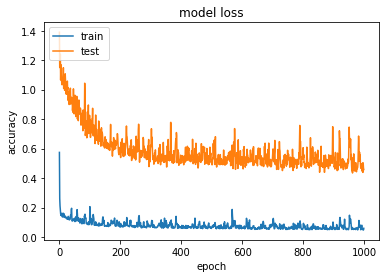

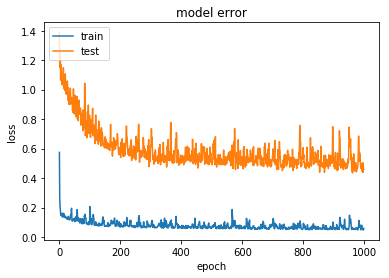

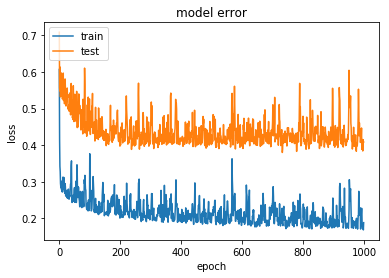

In [26]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



# summarize history for mean_squared_error
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model error')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()




# summarize history for mean_absolute_error
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model error')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [27]:
# Step 6 - Predict on the Test Data and Compute Evaluation Metrics


pred_train= model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))

pred= model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred)))


0.2678797150940509
0.6769005200225513


### Evaluation of the Model Performance

#### The output above shows that the RMSE, which is our evaluation metric, was 0.2678797150940509 for train data and 0.6769005200225513 for test data. 

Ideally, the lower the RMSE value, the better the model performance. 

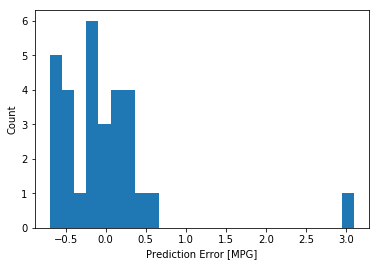

In [30]:
# It looks like our model predicts reasonably well. Let's take a look at the error distribution.
# It's quite gaussian


error = test_predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")